### Выполнил: - -
Для ввода данных выполните код в нижней ячейке

In [9]:
import math
import random
import scipy.stats as sp
import pandas as pd
from pathlib import Path
import os

x0, n, lmbd = None, None, None

def load_from_csv():
    file_path = Path(os.path.abspath(os.getcwd())+"/data.csv")
    if file_path.is_file():
        return pd.read_csv('data.csv')
    return pd.DataFrame(data= {'x0': [], 'n': [], 'lambda': []})

def save_data(df):
    df.to_csv('data.csv', index=False)
    return df

def load_data():    
    return load_from_csv()

def add_data (df):
    return df.append({'x0': x0, 'n': n, 'lambda': lmbd}, ignore_index=True)
   
input_data_frame = load_data()

while True:
    operation_num = int(input("Введите номер операции: \n1. Ввести самостоятельно x0, n, lambda. \n2. Загрузить из файла.\n"))

    if operation_num == 1:
        n = int(input("Введите n: " ))
        lmbd = float(input("Введите lmbd: "))
        x0 = float(input("Введите x0: "))

        if int(input("Сохранить введенные данные?: \n1. Да \n2. Нет\n")) == 1:
            print("Новое состояние хранилища:\n")
            input_data_frame = save_data(add_data(input_data_frame))
            display(input_data_frame)
        break

    if operation_num == 2:
        display(input_data_frame)
        row_number = int(input("Выберите номер записи или введите -1 для возврата:\n"))
        if row_number >= 0:
            row = input_data_frame.iloc[int(row_number)]
            x0, n, lmbd = float(row["x0"]),int(row["n"]),float(row["lambda"])
            print("Загружено из записи " +str(row_number)+ ":\n")
            break

print("Можно переходить к запуску кода из нижней ячейки")

Введите номер операции: 
1. Ввести самостоятельно x0, n, lambda. 
2. Загрузить из файла.
1
Введите n: 100
Введите lmbd: 0.1
Введите x0: 0.5
Сохранить введенные данные?: 
1. Да 
2. Нет
1
Новое состояние хранилища:



,x0,n,lambda
0,1.0,1.0,1.0
1,1.0,100.0,0.1
2,0.5,100.0,0.1


Можно переходить к запуску кода из нижней ячейки


In [10]:
x, y = [], []

def get_expected_value_theory():
    return 1/lmbd

def get_expected_value_practice():
    #return (1/n)*sum(y)
    return sp.describe(y).mean

def get_err (theory, practice):
    return (abs(theory-practice)/theory)*100

def get_expected_value_err():
    return get_err(get_expected_value_theory(), get_expected_value_practice())

def get_dispersion_theory():
    return 1/(lmbd**2) 

def get_dispersion_practice():
    squared_deviation = []
    for yi in y:
        squared_deviation.append( abs(yi-get_expected_value_practice()) )    
    return sum(squared_deviation)

def get_dispersion_err():
    return get_err(get_dispersion_theory(), get_dispersion_practice())

def get_distribution_theory(x):
    return 1-math.exp((-1)*lmbd*x)

def get_interval_count_less_x(x):
    count = 0
    for yi in y:
        if (yi < x):
            count += 1
    return count

def get_distribution_practice(x):
    return get_interval_count_less_x(x)/n

def get_distribution_err(x):
    return abs(get_distribution_theory(x)-get_distribution_practice(x))


def get_y (x):
    return (-1)*(math.log(1-x)/lmbd)


for i in range(0,n):
    x.append(random.randrange(0, 100, 1)/100)
    y.append( get_y(x[-1]) )

print(get_expected_value_err())
print(get_dispersion_err())
print(get_distribution_err(x0))


8.692679667180645
599.3755045994161
0.04122942450071401


### Гистограмма


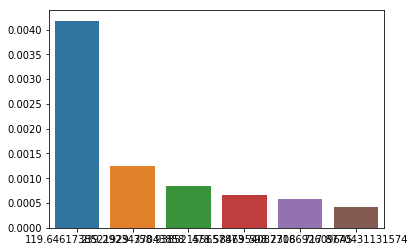

In [11]:
import numpy as np
import matplotlib.pyplot as plt


z = []
frequency_density = []

def get_sturges_digit_count ():
    m = 1.44*math.log(n) + 1
    m = int(m)
    return m

def get_digits_with_equal_length ():
    m = 1.44*math.log(n) + 1    
    mean_length = sum(y)/m

    z.insert(1,0)
    for i in range(1,int(m)):
        z.insert(i, z[i-1]+mean_length)           

    return z  


def get_digit_length (i):

    if (i < 0) or (i + 1  >= len(z)):
        return False
    
    y_sorted = y[:]
    y_sorted.sort()

    interval = pd.Interval(left=z[i], right=z[i+1], closed = "left")
        
    digit_len = 0
    
    for y_i in range(len(y_sorted)):
        summ = sum(y_sorted[0:y_i])        
        if sum(y_sorted[0:y_i]) in interval:
            digit_len+=1
    
    return digit_len


def get_frequency_density ():
    for i in range(len(z)-1):
        delta_i = z[i+1]-z[i]
        density = get_digit_length(i)/(n*delta_i)
        frequency_density.insert(i,float(density))

            
get_digits_with_equal_length ()
get_frequency_density ()


y_sorted= y[:]
y_sorted.sort()

import seaborn 

new_z = z[1:]

seaborn.barplot(x = new_z, y = frequency_density)


In [12]:
#распр плотности
def get_density_distribution(x):
    return lmbd*math.exp((-1)*lmbd*x)


#похожесть
def get_measure_of_similarity(): 
    deviations = []
    
    for i in range(len(z)-1):
        average_z = (z[i] + z[i+1])/2
        deviation = (get_density_distribution(average_z) - frequency_density[i])**2
        deviations.append(deviation)
    return sum(deviations)

print("Мера похожести: ", get_measure_of_similarity())

Мера похожести:  1.865320647957826e-05


### Часть 3

In [14]:
r = get_sturges_digit_count () - 1

# мера расхождения R0
def get_measure_of_discrepancy():
    elements = []
    m = get_sturges_digit_count ()
    
    for i in range(m-1):
        p_i = get_distribution_theory(z[i+1])-get_distribution_theory(z[i])
        print("z", z[i+1], z[i])
        print((get_distribution_theory(z[i+1])), get_distribution_theory(z[i]))     
        l_i = get_digit_length(i)
        
        r_0_i = ((l_i - (n*p_i))**2)/(n*p_i)

        elements.append(r_0_i)
        
    return sum(elements)
        
get_measure_of_discrepancy()

z 119.6461738521929 0
0.9999936344975224 0.0
z 239.2923477043858 119.6461738521929
0.9999999999594804 0.9999936344975224
z 358.93852155657873 239.2923477043858
0.9999999999999998 0.9999999999594804
z 478.5846954087716 358.93852155657873
1.0 0.9999999999999998
z 598.2308692609645 478.5846954087716
1.0 1.0


ZeroDivisionError: float division by zero

In [42]:
! git add *
! git commit -m !
! git push

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


[main d3e3275] !
 2 files changed, 218 insertions(+), 217 deletions(-)


To https://github.com/russianSlave/queuing_theory_lab1.git
   cace7b8..d3e3275  main -> main
